<a href="https://colab.research.google.com/github/deanzedd/Machine-Learning/blob/main/Ridge_and_Lasso_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge Regression

Sự thay đổi của Loss func trong ridge reg

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.datasets import load_diabetes
X,y= load_diabetes(return_X_y=True)
feature = load_diabetes()['feature_names'] #load feature(tính năng) like blood,...

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


<function matplotlib.pyplot.show(close=None, block=None)>

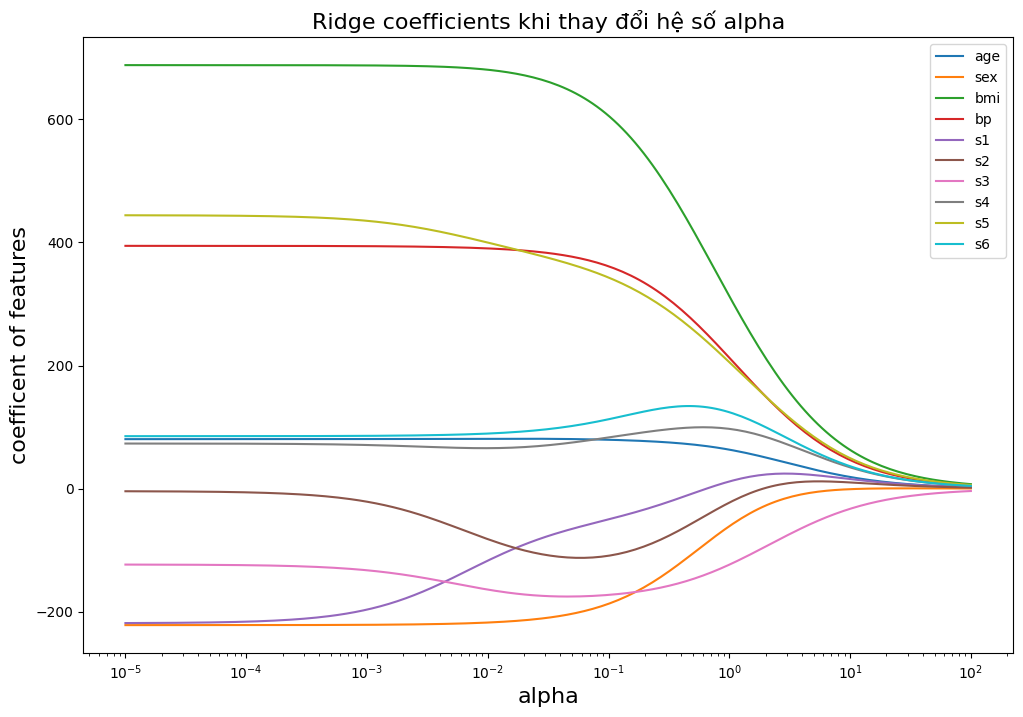

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

#thay đổi alphas từ 1--> 100
n_alphas = 200 #regularization parameter
alphas = np.logspace(-5, 2, n_alphas) #tạo các tham số alpha theo cấp số nhân
#để ý đồ thị dưới khi ở bên trái hệ số ko biến đổi j nh do tác động của alpha lên L(w) ít
coefs = []

#Huấn luyện model khi alpha thay đổi
for a in alphas:
  ridge = Ridge(alpha=a, fit_intercept=False)
  # default là dùng True
  # dùng fit_intercept=False khi có CHẮC NIỀM TIN
  # your data's underlying relationship does not include an intercept.
  # nghĩa là dữ liệu ko bao gồm phần chặn
  # có thể hiểu theo
  # The model will assume that the regression line passes through the origin (X,y)= (0, 0).
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_)

# Hiển thị kết quả mô hình cho các hệ số alpha
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha',fontsize =16)
plt.ylabel('coefficent of features', fontsize = 16)
plt.legend(feature)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show

sự thay đổi hệ số ước lượng(coeffcient of features) theo hệ số alpha. Khi alpha tăng thì ảnh hưởng của regularization term tăng -> hệ số giảm

*Huán luyện Ridge Regression*

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
reg_ridge = Ridge(alpha = 1.0)
reg_ridge.fit(X_train,y_train)

#sai số huấn luyện của mô hình trên tập train
print(reg_ridge.score(X_train,y_train))
#hệ số hồi quy và hệ số chặn
print(reg_ridge.coef_)
print(reg_ridge.intercept_)

0.4062759706618534
[  40.22980953  -61.68895989  273.28957886  197.33039238   -1.61646667
  -19.12539101 -142.98112377  107.37594422  195.22479197   84.33273189]
150.9272164651888


# Lasso regression

regularization term được thêm vào là alpha x L1

In [ ]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha = 1.0)
reg_lasso.fit(X_train,y_train)

#sai số huấn luyện của mô hình trên tập train
print(reg_lasso.score(X_train,y_train))

#hệ số hồi quy và hệ số bị chặn
print(reg_lasso.coef_)
print(reg_lasso.intercept_)

0.34247491466833135
[  0.          -0.         425.89571524  69.18564617   0.
   0.          -0.           0.         177.77602164   0.        ]
150.9774022110965


nếu muốn tuning hệ số alpha, sklearn có cung cấp thư viện làm việc này

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
# noise = 4 This parameter controls the amount of noise added to the generated data.
X,y = make_regression(noise=4, random_state=0)
reg_lasso_cv = LassoCV(cv=5, random_state=0).fit(X, y)

print(reg_lasso_cv.coef_)
print(reg_lasso_cv.intercept_)

[-4.21242132e-01 -0.00000000e+00  8.74020196e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.04074761e-02  7.46065852e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.72366886e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.29663159e-01
  1.43615035e-01  0.00000000e+00 -1.79948525e-01  0.00000000e+00
 -0.00000000e+00  7.30847374e+01 -3.43884703e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.13286030e-01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.94405369e+01 -0.00000000e+00 -0.00000000e+00
  5.23718682e+01  8.32674366e-01  4.35584487e+01 -0.00000000e+00
  0.00000000e+00  1.55124290e-01  2.58648431e-01 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.22013861e+01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.55887

Nhận xét thấy sẽ làm cho vecto hệ số ước lượng là 1 sparse vector(vecto thưa)

# Elastic net

elastic net = ridge + lasso

$\mathcal{L}(\mathbf{w})=\frac{1}{N}\|\overline{\mathbf{X}} \mathbf{w}-\mathbf{y}\|_2^2+\alpha\left[\lambda\|\mathbf{w}\|_1+\frac{(1-\lambda)}{2}\|\mathbf{w}\|_2^2\right]$

α là thành phần điều chuẩn

có thể huấn luyện dữ liệu từ thư viện sklearn cho sẵn là sklearn.linear_model.ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

reg = ElasticNet(alpha = 1.0, l1_ratio=0.5, random_state = 0)
reg.fit(X_train,y_train)

print(reg.coef_)
print(reg.intercept_)

[ 0.23525947  0.          3.36451156  2.31507683  0.24049309  0.01825777
 -1.8341374   1.96160292  2.7339625   1.47473889]
151.96891788315534


# Tuning hệ số cho mô hình hồi quy Ridge, Lasso và Elastic Net

tìm α -> thực hiện grid search trên không gian tham số α

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

X,y = load_diabetes(return_X_y=True)
feature = load_diabetes()['feature_names'] #load feature(tính năng) like blood,...
idx = np.arange(X.shape[0])

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, idx, test_size=0.33, random_state=42)

#khởi tạo phân chia tập train/test cho mô hình. đánh dấu chỉ số thuộc tập train là 0
split_index = [0 if i in idx_train else -1 for i in idx]
ps = PredefinedSplit(test_fold=split_index)

#khởi tạo pipeline gồm 2 bước,'scaler' để chuẩn hóa đầu vào và 'model' là bước huấn luyện
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

#Gridsearch mô hình trên không gian tham số alpha
#Hàm GridSearchCV để tìm kiếm siêu tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(1,10,1)},#tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps,#validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", #trung bình tổng thời gian phần dư
                      #ta lấy giá trị âm để tối ưu hóa giá trị scoring
                      verbose=3)#Tham số này điều khiển mức độ chi tiết của thông tin được in ra trong quá trình tìm kiếm
search.fit(X,y)
print(search.best_estimator_)
print("Best score: ",search.best_score_)


Fitting 1 folds for each of 9 candidates, totalling 9 fits
[CV 1/1] END ................model__alpha=1;, score=-3451.244 total time=   0.0s
[CV 1/1] END ................model__alpha=2;, score=-3487.387 total time=   0.0s
[CV 1/1] END ................model__alpha=3;, score=-3537.712 total time=   0.0s
[CV 1/1] END ................model__alpha=4;, score=-3592.514 total time=   0.0s
[CV 1/1] END ................model__alpha=5;, score=-3635.517 total time=   0.0s
[CV 1/1] END ................model__alpha=6;, score=-3644.689 total time=   0.0s
[CV 1/1] END ................model__alpha=7;, score=-3657.498 total time=   0.0s
[CV 1/1] END ................model__alpha=8;, score=-3673.971 total time=   0.0s
[CV 1/1] END ................model__alpha=9;, score=-3693.801 total time=   0.0s
Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=1))])
Best score:  -3451.2442486464993


Đối với mô hình Ridge

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

#GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(1,10,1)},
                      cv=ps,
                      scoring="neg_mean_squared_error",
                      verbose=3)
search.fit(X,y)
print(search.best_estimator_)
print("Best score: ",search.best_score_)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[CV 1/1] END ................model__alpha=1;, score=-3422.824 total time=   0.0s
[CV 1/1] END ................model__alpha=2;, score=-3423.774 total time=   0.0s
[CV 1/1] END ................model__alpha=3;, score=-3421.026 total time=   0.0s
[CV 1/1] END ................model__alpha=4;, score=-3417.143 total time=   0.0s
[CV 1/1] END ................model__alpha=5;, score=-3412.895 total time=   0.0s
[CV 1/1] END ................model__alpha=6;, score=-3408.586 total time=   0.0s
[CV 1/1] END ................model__alpha=7;, score=-3404.353 total time=   0.0s
[CV 1/1] END ................model__alpha=8;, score=-3400.262 total time=   0.0s
[CV 1/1] END ................model__alpha=9;, score=-3396.347 total time=   0.0s
Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=9))])
Best score:  -3396.3465942506955


Đối với mô hình ElasticNet regression

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet())
])

#Gridsearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {
                          'model__alpha':np.arange(1,10,1),#tham số alpha
                          'model__l1_ratio':[0.2,0.5,0.8] #tham số l1 ratio
                      },
                      cv = ps,#validation trên tập kiểm tra
                      scoring="neg_mean_squared_error",#trung bình tổng bình phương
                      verbose=3)

search.fit(X,y)
print(search.best_estimator_)
print("Best score: ",search.best_score_)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
[CV 1/1] END model__alpha=1, model__l1_ratio=0.2;, score=-3483.222 total time=   0.0s
[CV 1/1] END model__alpha=1, model__l1_ratio=0.5;, score=-3403.553 total time=   0.0s
[CV 1/1] END model__alpha=1, model__l1_ratio=0.8;, score=-3367.597 total time=   0.0s
[CV 1/1] END model__alpha=2, model__l1_ratio=0.2;, score=-3734.558 total time=   0.0s
[CV 1/1] END model__alpha=2, model__l1_ratio=0.5;, score=-3577.297 total time=   0.0s
[CV 1/1] END model__alpha=2, model__l1_ratio=0.8;, score=-3419.120 total time=   0.0s
[CV 1/1] END model__alpha=3, model__l1_ratio=0.2;, score=-3951.139 total time=   0.0s
[CV 1/1] END model__alpha=3, model__l1_ratio=0.5;, score=-3743.325 total time=   0.0s
[CV 1/1] END model__alpha=3, model__l1_ratio=0.8;, score=-3492.936 total time=   0.0s
[CV 1/1] END model__alpha=4, model__l1_ratio=0.2;, score=-4133.203 total time=   0.0s
[CV 1/1] END model__alpha=4, model__l1_ratio=0.5;, score=-3897.419 total time= 

# Tổng kết

Khi huấn luyện mô hình hồi qui trên bộ dữ liệu có nhiều biến đầu vào (dữ liệu cao chiều) và những biến này có sự tương quan lần nhau thì ước lượng từ mô hình hồi qui tuyến tính thường có phương sai cao dẫn tới **hiện tượng quá khớp**.

Để giảm thiểu hiện tượng quá khớp, thông thường sẽ cộng thêm **thành phần điều chuẩn(regularization term)** vào mô hình hồi qui.

Có ba kĩ thuật chính để giảm thiểu các hệ số ước lượng từ mô hình hồi qui đó là: **Ridge, Lasso và Elastic Net**. Trong đó Elastict Net là một kết hợp tuyến tính giữa hồi qui Lasso và Ridge.

Thành phần điều chuẩn của hồi qui Ridge chính là một trường hợp đặc biệt của điều chuẩn Tikhokov.

Hồi qui Ridge thì có thành phần điều chuẩn là L2
 trong khi Lasso sử dụng L1
.

Phương pháp tuning hệ số alpha
 của các thành phần điều chuẩn thông qua **cross-validation** để tìm ra mô hình phù hợp nhất.

# Bài tập

1.Trong hồi qui Ridge chúng ta sẽ kiểm soát hàm mất mát bằng cách nào?
- bằng cách thêm regularization term vào hàm loss để kiểm soát mức độ ảnh hưởng độ lớn của thành phần điều chuẩn-> tránh overfitting và ổn định ước lượng

2.Vì sao hồi qui Ridge luôn đảm bảo tìm được giá trị ước lượng cho bài toán tối ưu.
- vì theo mặt toán học thì $\frac{\partial \mathcal{L}(\mathbf{w})}{\partial \mathbf{w}}$ = 0 luôn có nghiệm

3.Theo phương pháp điều chuẩn Tikhokov thì ma trận
 của thành phần điều chuẩn thường là một ma trận như thế nào?
- ma trận luôn là ma trận đường chéo

4.Sử dụng bộ dữ liệu boston’s house price hãy phân chia tập train/test theo tỷ lệ 80:20. Xây dựng mô hình hồi qui hồi qui tuyến tính dự báo giá nhà trên tập train và đánh giá trên tập test.

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X,y = fetch_california_housing(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

MSE: 0.5558915986952422
[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
-37.02327770606391


huấn luyện Ridge reg

In [ ]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha = 1.0)
reg_ridge.fit(X_train,y_train)

print(reg_ridge.score(X_train,y_train))
print(reg_ridge.coef_)
print(reg_ridge.intercept_)





0.6125511245209703
[ 4.48510924e-01  9.72596535e-03 -1.23014157e-01  7.81416761e-01
 -2.02581346e-06 -3.52585878e-03 -4.19786908e-01 -4.33680793e-01]
-37.019419838012475


huấn luyện Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha = 1.0)
reg_lasso.fit(X_train,y_train)

print(reg_lasso.score(X_train,y_train)) #tính toán hệ số R^2, cho biết mức độ phù hợp của mô hình với dữ liệu huấn luyện
print(reg_lasso.coef_)
print(reg_lasso.intercept_)

0.29040715589885424
[ 1.48196324e-01  5.72821070e-03  0.00000000e+00 -0.00000000e+00
 -8.16437293e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
1.3446052311240813
